In [1]:
import networkx as nx
import collections
import matplotlib.pyplot as plt
from community import community_louvain

In [2]:
G = nx.readwrite.graphml.read_graphml('../Data/dolphin_association_weighted/weighted_gazda_SOCIAL_dolphin_florida.graphml')

#### Plot Degree Distribution

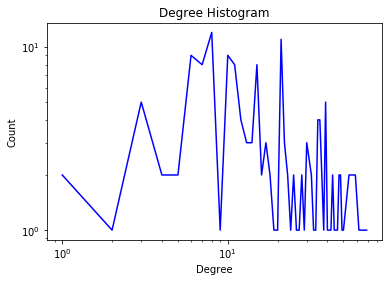

In [3]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.loglog(deg, cnt, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree");

In [4]:
if not nx.is_connected(G):
    G_max = max(nx.connected_component_subgraphs(G), key=len)

#### Diameter and Average Shortest Path Length

In [5]:
diameter = nx.diameter(G_max)
aspl = nx.average_shortest_path_length(G_max)
print("The network diameter is {}".format(diameter))
print("The network average shortest path is {}".format(aspl))

The network diameter is 4
The network average shortest path is 2.1751315073462725


#### Plot Clustering Coefficient Histogram

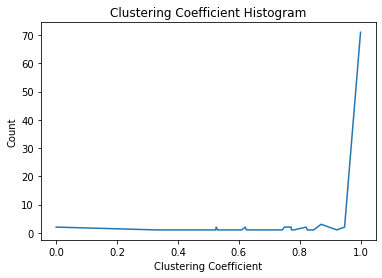

In [6]:
clustering = nx.clustering(G)
coeffSequence = sorted([c for c in clustering.values()], reverse = True)
coefficient_count = collections.Counter(coeffSequence)
coeff, coeff_count = zip(*coefficient_count.items())
fig, ax = plt.subplots()
plt.plot(coeff, coeff_count)
plt.title('Clustering Coefficient Histogram');
plt.ylabel('Count');
plt.xlabel('Clustering Coefficient');

#### Plot Degree Centrality Histogram

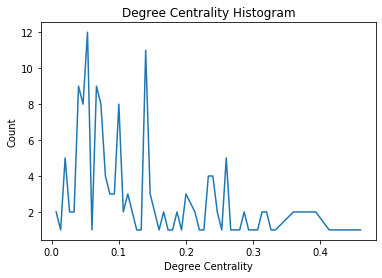

In [7]:
degree_centrality = nx.degree_centrality(G)
centralitySequence = sorted([c for c in degree_centrality.values()], reverse = True)
centralityCount = collections.Counter(centralitySequence)
centra, centra_count = zip(*centralityCount.items())
fig, ax = plt.subplots()
plt.plot(centra, centra_count)
plt.title('Degree Centrality Histogram')
plt.ylabel('Count')
plt.xlabel('Degree Centrality');

#### Plot the Betweenness Centrality Histogram 

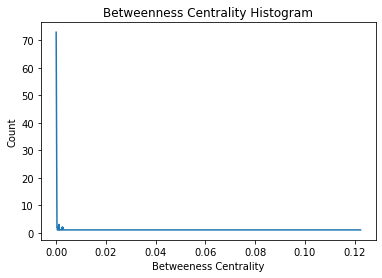

In [8]:
betweenness_centrality = nx.betweenness_centrality(G)
betweennessSequence = sorted([b for b in betweenness_centrality.values()], reverse = True)
betweennessCount = collections.Counter(betweennessSequence)
between, between_count = zip(*betweennessCount.items())
fig, ax = plt.subplots()
plt.plot(between, between_count)
plt.title('Betweenness Centrality Histogram')
plt.ylabel('Count')
plt.xlabel('Betweeness Centrality');

#### Plot the Eigenvector Centrality Histogram

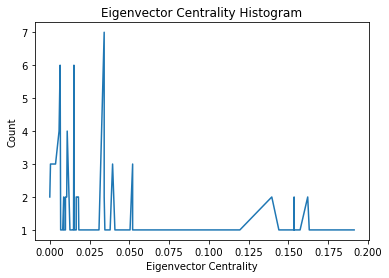

In [9]:
eigenvector_centrality = nx.eigenvector_centrality(G)
eigenvectorSequence = sorted([e for e in eigenvector_centrality.values()], reverse = True)
eigenvectorCount = collections.Counter(eigenvectorSequence)
eigen, eigen_count = zip(*eigenvectorCount.items())
fig, ax = plt.subplots()
plt.plot(eigen, eigen_count)
plt.title('Eigenvector Centrality Histogram')
plt.ylabel('Count')
plt.xlabel('Eigenvector Centrality');

#### Community Detection

In [10]:
communities = community_louvain.best_partition(G)
for n in G.nodes():
    G.nodes[n]['group'] = communities[n]
save_path = "./asianelephant_community.graphml"
nx.write_graphml(G, save_path)